In [1]:
import pandas as pd

In [2]:
# read in the data
crypt_data = pd.read_csv('Resources/crypto_data.csv', index_col=0)

In [3]:
crypt_data.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


## Data Preparation

In [4]:
# filter the data with isTrading = True
crypt_df = crypt_data[crypt_data['IsTrading']== True]

In [5]:
#Remove all rows that have at least one null value.
crypt_df = crypt_df.dropna()

In [6]:
# Filter for cryptocurrencies that have been mined
crypt_df = crypt_df[crypt_df['TotalCoinsMined']>0]

In [7]:
crypt_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [8]:
crypt_df['TotalCoinSupply'] = pd.to_numeric(crypt_df['TotalCoinSupply'])

# drop all nan rows, drop 'IsTrading' and 'CoinName' column
crypt_df = crypt_df.drop(['IsTrading','CoinName'], axis = 1)

In [9]:
crypt_df = pd.get_dummies(crypt_df, 
                          columns=['Algorithm', 'ProofType'],
                          drop_first=True, dtype=float)

In [10]:
crypt_df.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,4.200000e+01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,1.055185e+09,5.320000e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1337,2.927942e+10,3.141593e+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BTC,1.792718e+07,2.100000e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ETH,1.076842e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Standardize dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [12]:
scaled_data = scaler.fit_transform(crypt_df)

## Dimensionality Reduction

In [13]:
from sklearn.decomposition import PCA

In [14]:
# Initialize PCA model
# preserve 90% of the explained variance in dimensionality reduction.
pca = PCA(n_components=0.90)

# Get two principal components for the iris data.
crypto_pca = pca.fit_transform(scaled_data)

In [15]:
from sklearn.manifold import TSNE

In [16]:
# further reduce the dataset dimensions with t-SNE 
tsne = TSNE(learning_rate=400)
crypto_tsne = tsne.fit_transform(crypto_pca)

In [17]:
import matplotlib.pyplot as plt

In [18]:
crypt_df['x'] = crypto_tsne[:,0]
crypt_df['y'] = crypto_tsne[:,1]

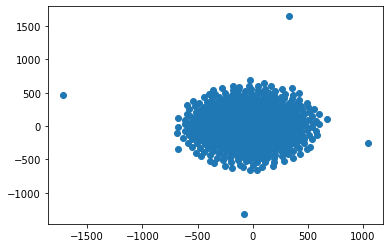

In [19]:
plt.scatter(crypt_df['x'],crypt_df['y'])
plt.show()

The scatter plot shows distinct clusters

## Cluster Analysis with K-Means

In [20]:
from sklearn.cluster import KMeans

###  Finding the best value for _k_ using the Elbow Curve

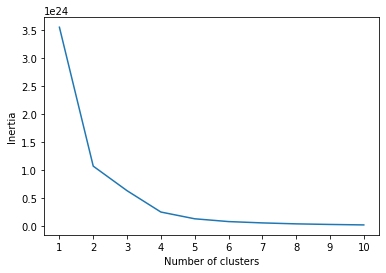

In [21]:
inertia = []
k = list(range(1, 11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypt_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [22]:
df_elbow

,k,inertia
0,1,3.556458e+24
1,2,1.073044e+24
2,3,6.341515e+23
3,4,2.526132e+23
4,5,1.319122e+23
5,6,8.205111e+22
6,7,5.829453e+22
7,8,4.120361e+22
8,9,3.058856e+22
9,10,2.232318e+22


- The best k value from the elbow plot is 4